In [1]:
import numpy as np
from scipy import linalg as LA
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def check_dims(m, shape):
    assert type(m) == np.ndarray, "input is not an array"
    assert m.shape == shape, "input shape {} does not match {}".format(m.shape, shape)

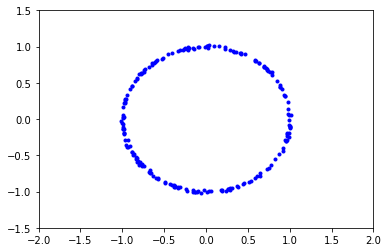

In [3]:
def p():
    N = 200
    t = 2 * np.pi * np.random.randn(N, 1)
    n1 = 0.01 * np.random.randn(N, 1)
    n2 = 0.01 * np.random.randn(N, 1)
    x = np.sin(t) + n1 # (N, 1)
    y = np.cos(t) + n2 # (N, 1)
    plt.plot(x, y, "b.")
    plt.ylim((-1.5, 1.5))
    plt.xlim((-2, 2))
p()

In [4]:
def show_data(x, y):
    plt.plot(x, y, "b.")
    plt.show()

## Helper Functions

In [5]:
def get_gaussian_kernel(x, gamma):
    N = x.shape[0]
    K = np.zeros((N, N))
    for i in range(K.shape[0]):
        for j in range(K.shape[1]):
            K[i, j] = np.exp(- (x[i] - x[j])**2 / gamma**2)
    return K

In [6]:
def incomplete_cholesky_decomposition(K, eta):
    pass

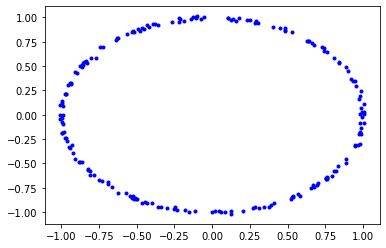

In [20]:
N = 200
t = 2 * np.pi * np.random.randn(N, 1)
n1 = 0.01 * np.random.randn(N, 1)
n2 = 0.01 * np.random.randn(N, 1)
x = np.sin(t) + n1 # (N, 1)
y = np.cos(t) + n2 # (N, 1)
show_data(x, y)
gamma = 1
eta = 1e-8
K = get_gaussian_kernel(x, gamma) # (N, N)
L = get_gaussian_kernel(y, gamma) # (N, N)
H = np.eye(N) - np.ones(N) / N

0.4999999997123335
0.009393633071467457
X on F_CX


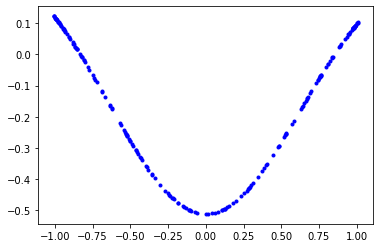

X on F_CX


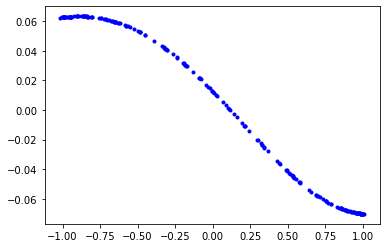

fcx on gcx


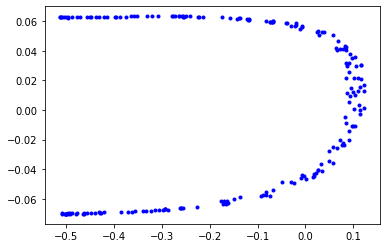

COCO 0.09154178190843101


In [27]:
Ktilde = H @ K @ H # (N, N)
Ltilde = H @ L @ H # (N, N)

Z = np.zeros((N, N))

A = np.block([
    [Z, (1/N * Ktilde @ Ltilde)],
    [(1/N * Ltilde @ Ktilde), Z]
])

B = np.block([
    [Ktilde, Z],
    [Z, Ltilde]
]) + (np.eye(2 * N) * 1e-8)

# R = incomplete_cholesky_decomposition()

# COCO solution
Dc,Vc = LA.eigh(A, B, eigvals_only=False)
ec1 = Vc[:, -1]
# print(np.real(Dc))
coco = np.real(Dc).max()
betac = ec1[N-1:(2*N-1)]
# print((ec1[0:N] @ Ktilde @ Ltilde).shape, betac.shape)
alphac = ec1[0:N] #@ Ktilde @ Ltilde @ betac.T
# print(alphac.shape, betac.shape)

fcx = K @ H @ alphac
gcx = L @ H @ betac

print(alphac.T @ Ktilde @ alphac)
print(betac.T @ Ltilde @ betac)
# np.sort(ec1)[0:N]
# ec1.shape, eigvects.shape
# alpha_coco = ec1
print("X on F_CX")
show_data(x, fcx)
print("X on F_CX")
show_data(y, gcx)
print("fcx on gcx")
show_data(fcx, gcx)
# plt.plot(fcx, gcx, 'k.')
print("COCO", coco)